Content.
There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two 
months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv("default.csv")
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [17]:
data.shape

(30000, 25)

In [18]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

## Reducing the extra data categories

In [19]:
# you can also use this code ==> cat = data.loc[:,"MARRIAGE"].unique()
cat3 = data["MARRIAGE"].value_counts()

data["MARRIAGE"].replace(0,3,inplace=True)

# you can also use this code ==>  data.loc[data["MARRIAGE"]==0,"MARRIAGE"]=0

cat3

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
# data["SEX"].value_counts()
cat = data["EDUCATION"].value_counts()

data["EDUCATION"].replace([0,6],5,inplace=True)

#data.loc[data["EDUCATION"]==0 ,"EDUCATION"] =5

cat


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [21]:
t = data["PAY_0"]
y = t.value_counts()
y

PAY = ["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

for neg in PAY:
    data.loc[data[neg]<=0,neg]=0
    data.loc[data[neg]>=4,neg]=3    
        
    

#data["PAY_0"].replace([-1,-2],0,inplace=True)
#data["PAY_2"].replace([-2,-1],0,inplace=True)
#data["PAY_3"].replace([-1,-2],0,inplace=True)
#data["PAY_4"].replace([-1,-2],0,inplace=True)
#data["PAY_5"].replace([-1,-2],0,inplace=True)
#data["PAY_6"].replace([-1,-2],0,inplace=True)
y

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [22]:
t = data["SEX"]
y = t.value_counts()
y

2    18112
1    11888
Name: SEX, dtype: int64

In [23]:
r = data["AGE"]
q = r[r<25]
q.shape

(2685,)

## Creating Dummy variables

In [24]:
new_data = pd.get_dummies(data,columns=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_5","PAY_3","PAY_4","PAY_6"],drop_first=True)
new_data.rename(columns={"default.payment.next.month":"default"},inplace=True)
new_data1 = new_data.drop(columns=["default","ID","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT5","BILL_AMT6","AGE","PAY_2_1","PAY_5_3","PAY_3_1","PAY_4_1","PAY_4_3","PAY_6_3","MARRIAGE_3","EDUCATION_4","EDUCATION_5"])
new_data2 = new_data["default"]
new_data1


,LIMIT_BAL,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,...,PAY_0_1,PAY_0_2,PAY_0_3,PAY_2_2,PAY_2_3,PAY_5_2,PAY_3_2,PAY_3_3,PAY_4_2,PAY_6_2
0,20000.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,...,0,1,0,1,0,0,0,0,0,0
1,120000.0,3272.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,90000.0,14331.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,50000.0,28314.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,50000.0,20940.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,88004.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,150000.0,8979.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,30000.0,20878.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,0,1,...,0,0,1,0,1,0,1,0,0,0
29998,80000.0,52774.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,0,0,...,1,0,0,0,0,0,0,0,0,0


## checking the relation between independent features

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(new_data1.values, i) for i in range(new_data1.shape[1])]

vif["features"] = new_data1.columns

vif

,VIF Factor,features
0,2.551441,LIMIT_BAL
1,1.836307,BILL_AMT4
2,1.341482,PAY_AMT1
3,1.254956,PAY_AMT2
4,1.321183,PAY_AMT3
5,1.227525,PAY_AMT4
6,1.213081,PAY_AMT5
7,1.204947,PAY_AMT6
8,2.167090,SEX_2
9,1.748808,EDUCATION_2


## Feature selection

There are in general two reasons why feature selection is used:
1. Reducing the number of features.
2. Understanding relationship of the features and the response variables.

PCA - Principal component analysis
RFE - recursive feature elemination
Univariate
Model Based Ranking

In [27]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor

X = new_data1
Y = new_data2
# feature extraction
model = RandomForestRegressor(n_estimators=10)
model.fit(X, Y)
print(pd.Series(model.feature_importances_, index=new_data1.columns ))


LIMIT_BAL      0.090279
BILL_AMT4      0.117946
PAY_AMT1       0.088891
PAY_AMT2       0.092387
PAY_AMT3       0.087022
PAY_AMT4       0.078843
PAY_AMT5       0.079540
PAY_AMT6       0.084674
SEX_2          0.017681
EDUCATION_2    0.016135
EDUCATION_3    0.013211
MARRIAGE_2     0.015416
PAY_0_1        0.005879
PAY_0_2        0.124356
PAY_0_3        0.006464
PAY_2_2        0.037630
PAY_2_3        0.015487
PAY_5_2        0.006247
PAY_3_2        0.006292
PAY_3_3        0.001016
PAY_4_2        0.007616
PAY_6_2        0.006990
dtype: float64


## Checking Targate variable as dichotomous (binary).

In [13]:
import seaborn as sb
sb.countplot(x='default', data = new_data)


## Creating the Confusion matrix and a data frame for model analysis

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import RobustScaler


Robust = RobustScaler()
new_data_set = Robust.fit_transform(new_data1)
x_train,x,y_train,y = train_test_split(new_data_set,new_data2,test_size=0.4,train_size=0.6,random_state=110,stratify=new_data2) 
x_val,x_test,y_val,y_test = train_test_split(x,y,test_size=0.5,train_size=0.5,random_state=110,stratify=y)

def CMet(CM, lables = ["pay","default"]):
    df = pd.DataFrame(data=CM,index=lables,columns=lables)
    df.index.name = "TRUE"
    df.columns.name = "PREDICTED"
    return df

matrics_after = pd.DataFrame(index=["precision","recall","accuracy"],columns=["NULL","Logistic","Randomf","Adjusted Th-rf"])
matrics = pd.DataFrame(index=["precision","recall","accuracy"],columns=["NULL","Logistic","Randomf","Adjusted Th-rf"])

### Accuracy : Overall how the model predicts defaulters and non-defaulters.
### Precision : How often is the model correct when it makes the prediction.
### Recall : The propotion of actual defaulters the model will correctly predict.


### Precision : A person who will pay predicted as defaulter
### Recall : A person who will not pay predicted as non-defaulter


### Recall is more important 

## Creating a Null matrix

In [15]:
rt = np.repeat(y_train.value_counts().idxmax(),y_val.size)
matrics.loc["precision","NULL"] = precision_score(y_val,rt)
matrics.loc["recall","NULL"] = recall_score(y_val,rt)
matrics.loc["accuracy","NULL"] = accuracy_score(y_val,rt)

matrics_after.loc["precision","NULL"] = precision_score(y_val,rt)
matrics_after.loc["recall","NULL"] = recall_score(y_val,rt)
matrics_after.loc["accuracy","NULL"] = accuracy_score(y_val,rt)

CM = confusion_matrix(y_val,rt)
print(CMet(CM))

matrics

PREDICTED   pay  default
TRUE                    
pay        4673        0
default    1327        0


/Users/akshaytiwari/Downloads/anaconda3/envs/latest/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,NULL,Logistic,Randomf,Adjusted Th-rf
precision,0,NaN,NaN,NaN
recall,0,NaN,NaN,NaN
accuracy,0.778833,NaN,NaN,NaN


## Model 1. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1,random_state=23,solver="sag",max_iter=10000)
log_reg.fit(x_train, y_train)
y_pred_LR = log_reg.predict(x_val)

matrics.loc["precision","Logistic"] = precision_score(y_val,y_pred_LR)
matrics.loc["recall","Logistic"] = recall_score(y_val,y_pred_LR)
matrics.loc["accuracy","Logistic"] = accuracy_score(y_val,y_pred_LR)

CM = confusion_matrix(y_val,y_pred_LR)
print(CMet(CM))
matrics


PREDICTED   pay  default
TRUE                    
pay        4430      243
default     879      448


,NULL,Logistic,Randomf,Adjusted Th-rf
precision,0,0.648336,NaN,NaN
recall,0,0.337604,NaN,NaN
accuracy,0.778833,0.813,NaN,NaN


In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1,random_state=23,solver="sag",max_iter=10000)
log_reg.fit(x_train, y_train)
y_pred_proba1 = log_reg.predict_proba(x_val)[:,1]
y_pred_LR_T = (y_pred_proba1>=0.23).astype("int")

matrics_after.loc["precision","Logistic"] = precision_score(y_val,y_pred_LR_T)
matrics_after.loc["recall","Logistic"] = recall_score(y_val,y_pred_LR_T)
matrics_after.loc["accuracy","Logistic"] = accuracy_score(y_val,y_pred_LR_T)

CM = confusion_matrix(y_val,y_pred_LR_T)
print(CMet(CM))
matrics_after


PREDICTED   pay  default
TRUE                    
pay        3950      723
default     626      701


,NULL,Logistic,Randomf,Adjusted Th-rf
precision,0,0.492275,NaN,NaN
recall,0,0.528259,NaN,NaN
accuracy,0.778833,0.775167,NaN,NaN


## Model 2. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(min_samples_split=30,min_samples_leaf=10,random_state=15)
forest.fit(x_train,y_train)
y_rf_pred_val = forest.predict(x_val)

matrics.loc["precision","Randomf"] = precision_score(y_val,y_rf_pred_val)
matrics.loc["recall","Randomf"] = recall_score(y_val,y_rf_pred_val)
matrics.loc["accuracy","Randomf"] = accuracy_score(y_val,y_rf_pred_val)

CM = confusion_matrix(y_val,y_rf_pred_val)
print(CMet(CM))
matrics


/Users/akshaytiwari/Downloads/anaconda3/envs/latest/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


PREDICTED   pay  default
TRUE                    
pay        4429      244
default     876      451


,NULL,Logistic,Randomf,Adjusted Th-rf
precision,0,0.648336,0.648921,NaN
recall,0,0.337604,0.339864,NaN
accuracy,0.778833,0.813,0.813333,NaN


In [19]:
y_pred_prob = forest.predict_proba(x_val)[:,1]
y_rf_pred_val_th = (y_pred_prob>=0.24).astype(int)

matrics_after.loc["precision","Adjusted Th-rf"] = precision_score(y_val,y_rf_pred_val_th)
matrics_after.loc["recall","Adjusted Th-rf"] = recall_score(y_val,y_rf_pred_val_th)
matrics_after.loc["accuracy","Adjusted Th-rf"] = accuracy_score(y_val,y_rf_pred_val_th)

CM = confusion_matrix(y_val,y_rf_pred_val_th)
print(CMet(CM))
matrics_after 

PREDICTED   pay  default
TRUE                    
pay        3702      971
default     518      809


,NULL,Logistic,Randomf,Adjusted Th-rf
precision,0,0.492275,NaN,0.454494
recall,0,0.528259,NaN,0.609646
accuracy,0.778833,0.775167,NaN,0.751833


## Finding - Recall,Precision and Threshhold 


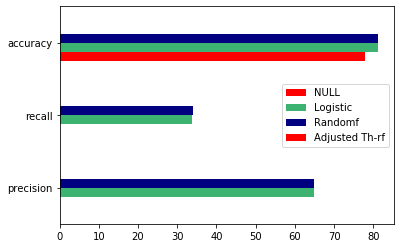

In [20]:
import matplotlib.pyplot as plt
q = 100*matrics
q.plot(kind = "barh",color = ["r","mediumseagreen","navy"])

In [21]:
precision_val, recall_val, threshhold = precision_recall_curve(y_val,log_reg.predict_proba(x_val)[:,1])
precision_val_rf,recall_val_rf,threshhold_rf = precision_recall_curve(y_val,forest.predict_proba(x_val)[:,1])

## Precision vs recall      |       Log_reg vs Random_forest

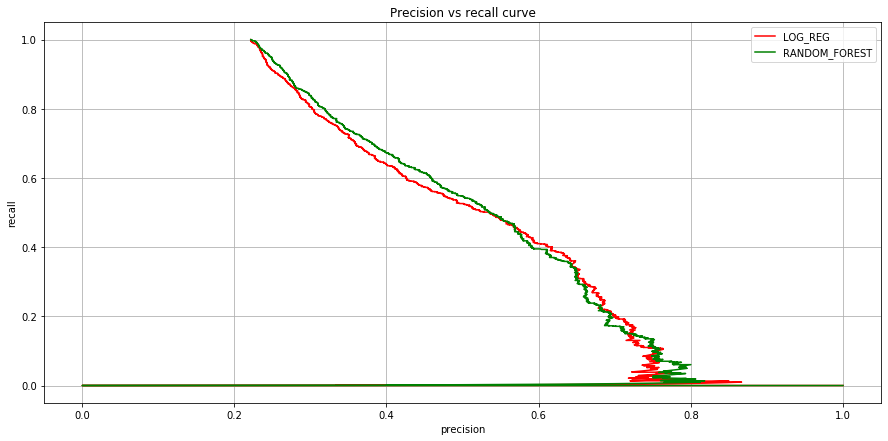

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[15,7])
ax.plot(precision_val,recall_val,color = "r",label = "LOG_REG")
ax.plot(precision_val_rf,recall_val_rf,color = "green",label = "RANDOM_FOREST")
ax.set_xlabel("precision")
ax.set_ylabel("recall")
ax.set_title("Precision vs recall curve")
ax.legend()
ax.grid();

## Finding the required Threshold

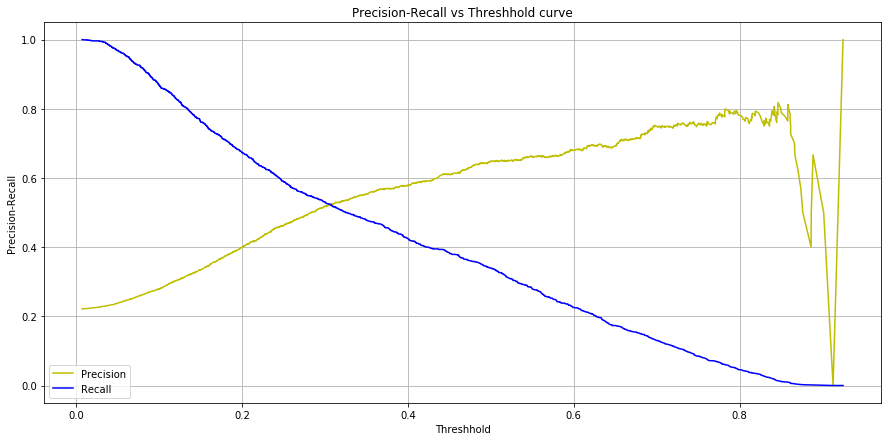

In [23]:
e= precision_val_rf 
f = recall_val_rf

precision_val_rf1= np.delete(e,1,0)
recall_val_rf1 = np.delete(f,1,0)


fig,ax = plt.subplots(figsize=[15,7])
ax.plot(threshhold_rf,precision_val_rf1,color="y",label="Precision")
ax.plot(threshhold_rf,recall_val_rf1,color="b",label ="Recall")
ax.set_xlabel("Threshhold")
ax.set_ylabel("Precision-Recall")
ax.set_title("Precision-Recall vs Threshhold curve")
ax.legend()
ax.grid()


## Plotting a ROC curve

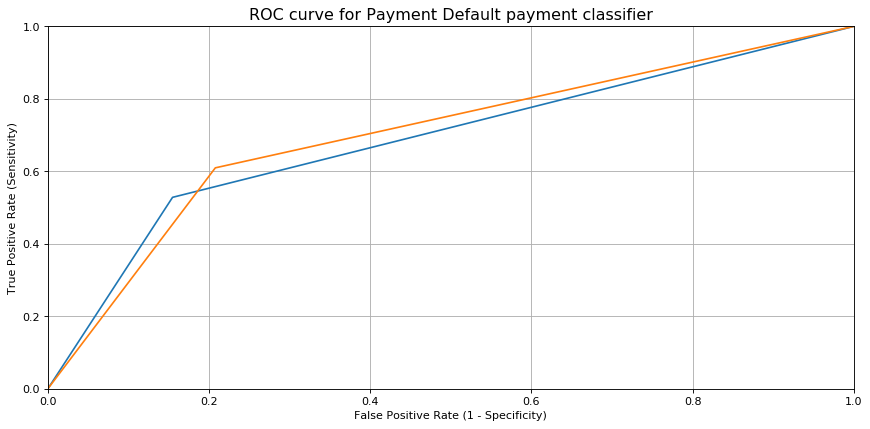

In [24]:
import sklearn.metrics as metrics
import sklearn.metrics as mt

from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')

fpr, tpr, thresholds = mt.roc_curve(y_val, y_pred_LR_T)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Payment Default payment classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


fpr, tpr, thresholds = mt.roc_curve(y_val, y_rf_pred_val_th)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Payment Default payment classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


## Getting AOC Value

In [25]:
print(metrics.roc_auc_score(y_val,y_pred_LR_T ))
print(metrics.roc_auc_score(y_val, y_rf_pred_val_th))

0.6867703175790119
0.7009281945005951
